This notebook allows to reproduce **Figure S3** of the paper "Covering the Combinatorial Design Space of Multiplex CRISPR/Cas Experiments in Plants" by Kirsten Van Huffel, Michiel Stock, Thomas Jacobs, Tom Ruttink and Bernard De Baets.

#### Load packages

In [1]:
using Random 
using Plots  
using Distributions 
using LinearAlgebra
using Combinatorics
using BioCCP


(process:41440): GLib-GIO-WARNING **: 14:24:26.815: Unexpectedly, UWP app `HaukeGtze.7-ZipFileManagerUnofficial_1.2107.2.0_x64__6bk20wvc8rfx2' (AUMId `HaukeGtze.7-ZipFileManagerUnofficial_6bk20wvc8rfx2!zFM.exe') supports 36 extensions but has no verbs


#### Load BioCCP- and simulation-based framework

In [2]:
include("MultiplexCrisprDOE.jl");

#### Set seed for reproducibility

In [3]:
Random.seed!(1)

TaskLocalRNG()

- Figure S3A: Study influence of *Split* on the expected plant library size for full coverage  

In [4]:
include("DefaultParameters_k=3.jl");

In [5]:
### x_subset = 5
x = 5
n_gRNA_total = x * g
Random.seed!(1)
p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

E_5_sim, sd_5_sim = simulate_Nₓ₃(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

E_5_bioccp, sd_5_bioccp = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

### x_subset = 10
x = 10
n_gRNA_total = x * g
Random.seed!(1)
p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

E_10_sim, sd_10_sim = simulate_Nₓ₃(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

E_10_bioccp, sd_10_bioccp = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

### x_subset = 20
x = 20
n_gRNA_total = x * g
Random.seed!(1)
p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
Random.seed!(1)
p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

E_20_sim, sd_20_sim = simulate_Nₓ₃(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

E_20_bioccp, sd_20_bioccp = BioCCP_Nₓ₃(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

(31348, 5979)

In [6]:
E_split_sim = [E_20_sim, 2*E_10_sim, 4*E_5_sim]
E_split_bioccp = [E_20_bioccp, 2*E_10_bioccp, 4*E_5_bioccp]
sd_split_sim = [sd_20_sim, sd_10_sim, sd_5_sim]
sd_split_bioccp = [sd_20_bioccp, sd_10_bioccp, sd_5_bioccp];

In [7]:
E_20_sim, E_10_sim, E_5_sim 

(31608.45, 2329.25, 189.096)

In [8]:
E_split_sim

3-element Vector{Float64}:
 31608.45
  4658.5
   756.384

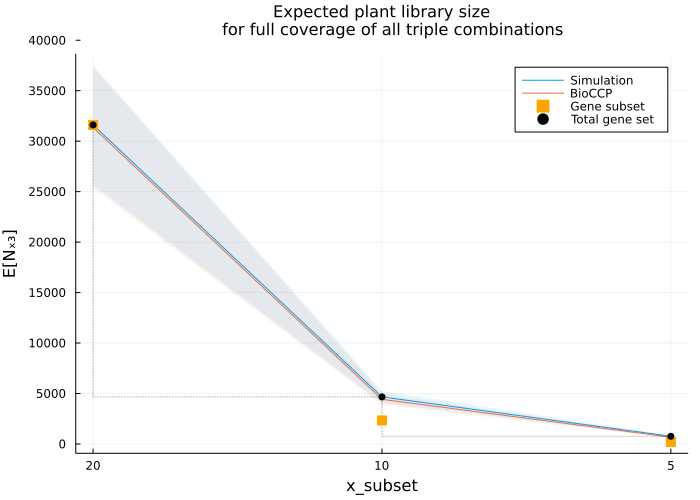

In [9]:
plot([20, 10, 5], E_split_sim, label="Simulation", 
    title="Expected plant library size
    for full coverage of all triple combinations
    ", xlabel="x_subset", ylabel="E[Nₓ₃]",
    ribbon = sd_split_sim, fillalpha=.1,
    xticks = ([20, 10, 5], string.([20, 10, 5])),
    yticks = (0:5000:50000, string.(0:5000:50000)),
size = ((700,500)),
titlefont=font(11),
guidefontsize =11, guidefontfamily=101)


plot!(collect([20, 10, 5]), E_split_bioccp,  label="BioCCP",
    ribbon = sd_split_bioccp, 
    fillalpha=.1,
    xflip=true
)

plot!([20, 10, 5], E_split_sim,  label="", xaxis=:log10, linestyle = :dot, linealpha = 0.5,
    seriestype = :steppre, linecolor = :black)

scatter!([20, 10,5], [E_20_sim, E_10_sim, E_5_sim],markersize = 5, markercolor = :orange, 
    label="Gene subset", markershape = :square,     markerstrokecolor = :orange,
)
scatter!([20,10,5], [E_20_sim, 2*E_10_sim, 4*E_5_sim],markersize = 4, markercolor = :black, label="Total gene set")

- Figure S3B: Study influence of *Split* on the expected combinatorial coverage w.r.t. plant library size

In [10]:
include("DefaultParameters_k=3.jl"); # reset to default values

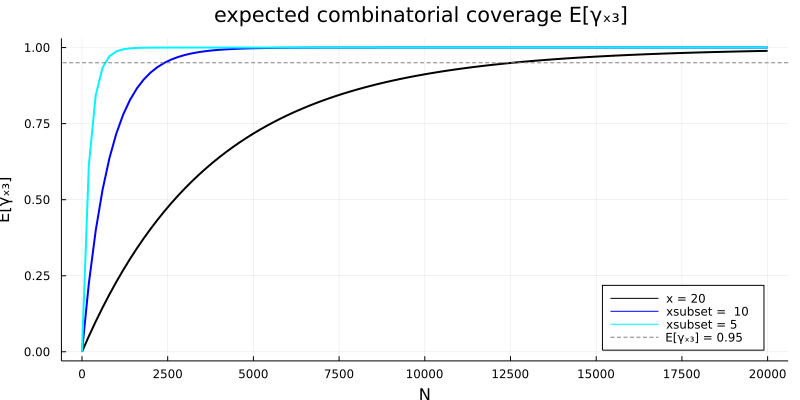

In [11]:
plant_library_sizes = 0:200:20000
expected_γₓ₃_20 = []
expected_γₓ₃_10_10 = []
expected_γₓ₃_5_5_5_5 = []

x_total = 20

for N in plant_library_sizes
    
    # no split
    n_gRNA_total = x_total * g
    Random.seed!(1)
    p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
    p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

    push!(expected_γₓ₃_20, BioCCP_γₓ₃(x_total, 
                                         N,
                                         g, 
                                         r, 
                                         n_gRNA_total, 
                                         p_gRNA_freq, 
                                         p_gRNA_edit, ϵ_KO))
    
    # split in two subsets
    f_subset = 0.5
    x_subset = Int(x_total * f_subset)
    n_gRNA_total = x_subset * g
    Random.seed!(1)
    p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
    p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

    push!(expected_γₓ₃_10_10, BioCCP_γₓ₃(x_subset, 
                                         Int(ceil(N * f_subset)),
                                         g, 
                                         r, 
                                         n_gRNA_total, 
                                         p_gRNA_freq, 
                                         p_gRNA_edit, ϵ_KO))
    # split in four subsets
    f_subset = 0.25
    x_subset = Int(x_total * f_subset)
    n_gRNA_total = x_subset * g
    Random.seed!(1)
    p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
    p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

    push!(expected_γₓ₃_5_5_5_5, BioCCP_γₓ₃(x_subset, 
                                            Int(ceil(N * f_subset)),
                                             g, 
                                             r, 
                                             n_gRNA_total, 
                                             p_gRNA_freq, 
                                             p_gRNA_edit, ϵ_KO))

  
end
 
plot(plant_library_sizes, expected_γₓ₃_20, label="x = 20", color=:black, linewidth=2)

plot!(plant_library_sizes, expected_γₓ₃_10_10,
label="xsubset =  10", title="expected combinatorial coverage E[γₓ₃] 
    ",
xlabel="N", ylabel="E[γₓ₃]", 
        xticks = (0:2500:30000, string.(0:2500:30000)),
 size=(800,400), color=:blue, linewidth=2)

plot!(plant_library_sizes, expected_γₓ₃_5_5_5_5, label="xsubset = 5", color=:turquoise1, linewidth=2)

hline!([0.95], linestyle=:dash, color=:grey, label="E[γₓ₃] = 0.95", legend=:bottomright)